<a href="https://colab.research.google.com/github/TiagLopes/Estudo-de-Caso/blob/main/UniCarioca_An%C3%A1lise_de_Contratos_em_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Pós-graduação em Ciência de Dados (Centro Universitário UniCarioca)**

Análise de Contratos

Prof: Sergio Assunção Monteiro

Alunos: Tiago Lopes e Vinícius Ferreira.

# **Instalação de pacotes**

In [ ]:
# Instalação de pacotes necessários
!pip install pandas faker

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 14.6 MB/s eta 0:00:00


# **Importação de bibliotecas**

In [ ]:
# Importação de bibliotecas
import pandas as pd
import random
import numpy as np
from faker import Faker
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# **Definição de listas e parâmetros**

In [ ]:
# Configuração do Faker para geração de dados fictícios
fake = Faker('pt_BR')  # Configura o faker para o contexto brasileiro

# Lista das cidades brasileiras
cidades_brasil = [
    {'cidade': 'Rio de Janeiro', 'estado': 'RJ', 'latitude': -22.9068, 'longitude': -43.1729, 'regiao': 'Sudeste'},
    {'cidade': 'São Paulo', 'estado': 'SP', 'latitude': -23.5505, 'longitude': -46.6333, 'regiao': 'Sudeste'},
    {'cidade': 'Brasília', 'estado': 'DF', 'latitude': -15.7801, 'longitude': -47.9292, 'regiao': 'Centro-Oeste'},
    {'cidade': 'Salvador', 'estado': 'BA', 'latitude': -12.9714, 'longitude': -38.5014, 'regiao': 'Nordeste'},
    {'cidade': 'Fortaleza', 'estado': 'CE', 'latitude': -3.7172, 'longitude': -38.5433, 'regiao': 'Nordeste'},
    {'cidade': 'Rio Branco', 'estado': 'AC', 'latitude': -9.9747, 'longitude': -67.8076, 'regiao': 'Norte'},
    {'cidade': 'Maceió', 'estado': 'AL', 'latitude': -9.66599, 'longitude': -35.735, 'regiao': 'Nordeste'},
    {'cidade': 'Macapá', 'estado': 'AP', 'latitude': 0.0356, 'longitude': -51.0706, 'regiao': 'Norte'},
    {'cidade': 'Manaus', 'estado': 'AM', 'latitude': -3.119, 'longitude': -60.0212, 'regiao': 'Norte'},
    {'cidade': 'Salvador', 'estado': 'BA', 'latitude': -12.9714, 'longitude': -38.5014, 'regiao': 'Nordeste'},
    {'cidade': 'Fortaleza', 'estado': 'CE', 'latitude': -3.7172, 'longitude': -38.5433, 'regiao': 'Nordeste'},
    {'cidade': 'Brasília', 'estado': 'DF', 'latitude': -15.7801, 'longitude': -47.9292, 'regiao': 'Centro-Oeste'},
    {'cidade': 'Vitória', 'estado': 'ES', 'latitude': -20.3155, 'longitude': -40.3128, 'regiao': 'Sudeste'},
    {'cidade': 'Goiânia', 'estado': 'GO', 'latitude': -16.6864, 'longitude': -49.2643, 'regiao': 'Centro-Oeste'},
    {'cidade': 'São Luís', 'estado': 'MA', 'latitude': -2.53874, 'longitude': -44.2825, 'regiao': 'Nordeste'},
    {'cidade': 'Cuiabá', 'estado': 'MT', 'latitude': -15.601, 'longitude': -56.0974, 'regiao': 'Centro-Oeste'},
    {'cidade': 'Campo Grande', 'estado': 'MS', 'latitude': -20.4486, 'longitude': -54.6295, 'regiao': 'Centro-Oeste'},
    {'cidade': 'Belo Horizonte', 'estado': 'MG', 'latitude': -19.9102, 'longitude': -43.9266, 'regiao': 'Sudeste'},
    {'cidade': 'Belém', 'estado': 'PA', 'latitude': -1.4554, 'longitude': -48.4898, 'regiao': 'Norte'},
    {'cidade': 'João Pessoa', 'estado': 'PB', 'latitude': -7.11509, 'longitude': -34.8641, 'regiao': 'Nordeste'},
    {'cidade': 'Curitiba', 'estado': 'PR', 'latitude': -25.4195, 'longitude': -49.2646, 'regiao': 'Sul'},
    {'cidade': 'Recife', 'estado': 'PE', 'latitude': -8.04756, 'longitude': -34.877, 'regiao': 'Nordeste'},
    {'cidade': 'Teresina', 'estado': 'PI', 'latitude': -5.09194, 'longitude': -42.8034, 'regiao': 'Nordeste'},
    {'cidade': 'Rio de Janeiro', 'estado': 'RJ', 'latitude': -22.9068, 'longitude': -43.1729, 'regiao': 'Sudeste'},
    {'cidade': 'Natal', 'estado': 'RN', 'latitude': -5.79447, 'longitude': -35.211, 'regiao': 'Nordeste'},
    {'cidade': 'Porto Alegre', 'estado': 'RS', 'latitude': -30.0328, 'longitude': -51.2176, 'regiao': 'Sul'},
    {'cidade': 'Porto Velho', 'estado': 'RO', 'latitude': -8.76077, 'longitude': -63.8999, 'regiao': 'Norte'},
    {'cidade': 'Boa Vista', 'estado': 'RR', 'latitude': 2.82185, 'longitude': -60.6715, 'regiao': 'Norte'},
    {'cidade': 'Florianópolis', 'estado': 'SC', 'latitude': -27.5954, 'longitude': -48.548, 'regiao': 'Sul'},
    {'cidade': 'São Paulo', 'estado': 'SP', 'latitude': -23.5505, 'longitude': -46.6333, 'regiao': 'Sudeste'},
    {'cidade': 'Aracaju', 'estado': 'SE', 'latitude': -10.9472, 'longitude': -37.0731, 'regiao': 'Nordeste'},
    {'cidade': 'Palmas', 'estado': 'TO', 'latitude': -10.2128, 'longitude': -48.3607, 'regiao': 'Norte'}
]

# Lista dos ministérios e agências
ministerios_agencias = [
    "Ministério da Saúde",
    "Ministério da Educação",
    "Ministério da Economia",
    "Ministério da Justiça",
    "Ministério da Defesa",
    "Ministério das Relações Exteriores",
    "Ministério do Meio Ambiente",
    "Ministério do Desenvolvimento Regional",
    "Ministério da Agricultura, Pecuária e Abastecimento",
]

# **Geração de dados de contratos**

In [ ]:
from faker import Faker
import random
from datetime import timedelta

fake = Faker('pt_BR')

# Lista de tipos de empresas
tipos_empresas = ['EIRELI', 'S/A', 'LTDA', 'ME', 'MEI']

# Seu código para geração de dados
quantidade_de_contratos = 3000
dados_contrato = []

for _ in range(quantidade_de_contratos):
    numero_contrato = fake.random_int(min=1000, max=9999)
    data_assinatura = fake.date_between(start_date='-5y', end_date='today')
    valor_contrato = round(random.uniform(10000, 50000), 2)
    duracao_contrato = fake.random_int(min=1, max=5)

    # Escolha aleatória do tipo de empresa
    tipo_empresa = fake.random_element(tipos_empresas)

    # Adição do tipo de empresa ao nome do fornecedor
    nome_fornecedor = f"{fake.company()} {tipo_empresa}"

    agencia_governamental = random.choice(ministerios_agencias)
    valor_total_contrato = valor_contrato
    valor_pago = round(random.uniform(0, valor_contrato), 2)
    valor_a_pagar = valor_total_contrato - valor_pago
    data_pagamento_parcela = [fake.date_between_dates(date_start=data_assinatura, date_end=data_assinatura + timedelta(days=365 * duracao_contrato)) for _ in range(duracao_contrato)]

    # Dados Geográficos (gerados aleatoriamente para diferentes cidades do Brasil)
    cidade_info = random.choice(cidades_brasil)
    latitude = cidade_info['latitude']
    longitude = cidade_info['longitude']
    regiao = cidade_info['regiao']
    estado = cidade_info['estado']

    # Histórico de Pagamentos (lista de pagamentos)
    historico_pagamentos = []
    for i in range(duracao_contrato):
        valor_parcela = round(random.uniform(0, valor_a_pagar), 2)
        data_pagamento = data_pagamento_parcela[i]
        valor_a_pagar -= valor_parcela
        historico_pagamentos.append({'Data Pagamento': data_pagamento, 'Valor': valor_parcela})

    # Adicione os dados à lista
    dados_contrato.append([
        numero_contrato, data_assinatura, valor_contrato, duracao_contrato, nome_fornecedor,
        agencia_governamental, valor_total_contrato, valor_pago, valor_a_pagar, data_pagamento_parcela,
        latitude, longitude, regiao, estado, historico_pagamentos
    ])

# Criação do DataFrame com os dados gerados
colunas = [
    "Número do contrato", "Data de assinatura do contrato", "Valor do contrato", "Duração do contrato",
    "Nome da empresa ou fornecedor contratado", "Nome da agência governamental", "Valor total do contrato",
    "Valor pago até o momento", "Valor a ser pago no futuro", "Data de pagamento de parcelas", "Latitude", "Longitude",
    "Região", "Estado", "Histórico de Pagamentos"
]
df = pd.DataFrame(dados_contrato, columns=colunas)

# Exibindo um exemplo
print(df.head())


   Número do contrato Data de assinatura do contrato  Valor do contrato  \
0                3643                     2020-06-11           23979.73   
1                6988                     2021-12-15           45533.14   
2                8049                     2023-01-20           43671.79   
3                4691                     2021-07-23           44221.83   
4                1608                     2019-08-09           37843.07   

   Duração do contrato Nome da empresa ou fornecedor contratado  \
0                    4                            Oliveira LTDA   
1                    3                 Rodrigues Pires Ltda. ME   
2                    2                               Castro MEI   
3                    4                 Alves Ferreira Ltda. MEI   
4                    4                Carvalho da Mata - ME S/A   

  Nome da agência governamental  Valor total do contrato  \
0        Ministério da Educação                 23979.73   
1           Ministério da 

In [ ]:
# Salvando o DataFrame em um arquivo CSV
df.to_csv('dados_contrato.csv', index=False)
print("Planilha de dados gerada e salva em 'dados_contrato.csv'")

Planilha de dados gerada e salva em 'dados_contrato.csv'


# **Análise de contratos**

In [ ]:
# Leitura dos dados do arquivo CSV
dados_contrato = pd.read_csv('dados_contrato.csv')

# Exibir as primeiras linhas do DataFrame para verificar os dados
print(dados_contrato.head())

   Número do contrato Data de assinatura do contrato  Valor do contrato  \
0                3643                     2020-06-11           23979.73   
1                6988                     2021-12-15           45533.14   
2                8049                     2023-01-20           43671.79   
3                4691                     2021-07-23           44221.83   
4                1608                     2019-08-09           37843.07   

   Duração do contrato Nome da empresa ou fornecedor contratado  \
0                    4                            Oliveira LTDA   
1                    3                 Rodrigues Pires Ltda. ME   
2                    2                               Castro MEI   
3                    4                 Alves Ferreira Ltda. MEI   
4                    4                Carvalho da Mata - ME S/A   

  Nome da agência governamental  Valor total do contrato  \
0        Ministério da Educação                 23979.73   
1           Ministério da 

In [ ]:
# Análise exploratória simples e estatísticas descritivas dos valores dos contratos
estatisticas_contratos = dados_contrato[['Valor do contrato', 'Valor total do contrato',
                                         'Valor pago até o momento', 'Valor a ser pago no futuro']].describe()
print(estatisticas_contratos)

       Valor do contrato  Valor total do contrato  Valor pago até o momento  \
count        3000.000000              3000.000000               3000.000000   
mean        30091.883820             30091.883820              15272.520887   
std         11609.355546             11609.355546              11296.287902   
min         10008.200000             10008.200000                  5.190000   
25%         19868.420000             19868.420000               6245.797500   
50%         30494.530000             30494.530000              12629.225000   
75%         40038.475000             40038.475000              22917.897500   
max         49992.090000             49992.090000              48485.130000   

       Valor a ser pago no futuro  
count                3.000000e+03  
mean                 2.777235e+03  
std                  5.072054e+03  
min                  1.364242e-12  
25%                  1.069450e+02  
50%                  6.581750e+02  
75%                  3.058345e+03  


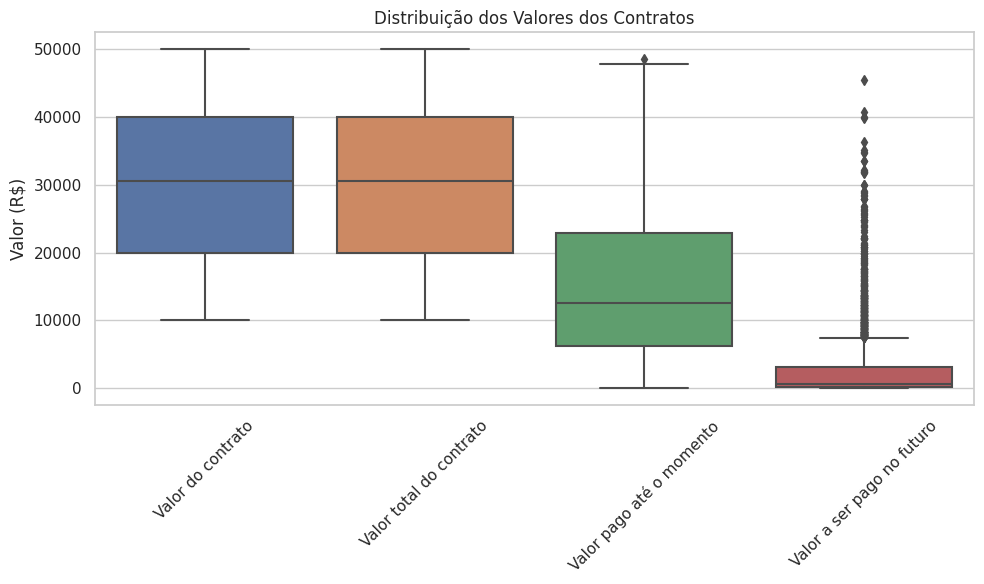

In [ ]:
# Visualização dos valores dos contratos
plt.figure(figsize=(10, 6))
sns.set(style='whitegrid')
sns.boxplot(data=dados_contrato[['Valor do contrato', 'Valor total do contrato',
                                 'Valor pago até o momento', 'Valor a ser pago no futuro']])
plt.title('Distribuição dos Valores dos Contratos')
plt.ylabel('Valor (R$)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

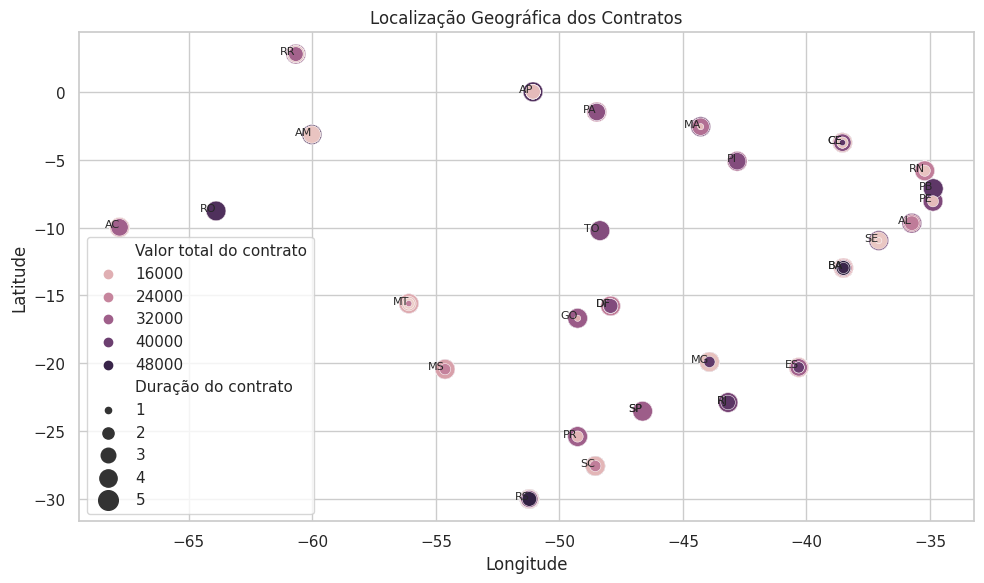

In [ ]:
# Visualização da localização geográfica dos contratos
plt.figure(figsize=(10, 6))
sns.set(style='whitegrid')
scatter_plot = sns.scatterplot(data=df, x='Longitude', y='Latitude',
                               hue='Valor total do contrato', size='Duração do contrato', sizes=(20, 200))
for cidade in cidades_brasil:
    scatter_plot.text(cidade['longitude'], cidade['latitude'], cidade['estado'], fontsize=8, ha='right')
plt.title('Localização Geográfica dos Contratos')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.tight_layout()
plt.show()

<ipython-input-10-94dc5422a43e>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlacao = dados_contrato.corr()


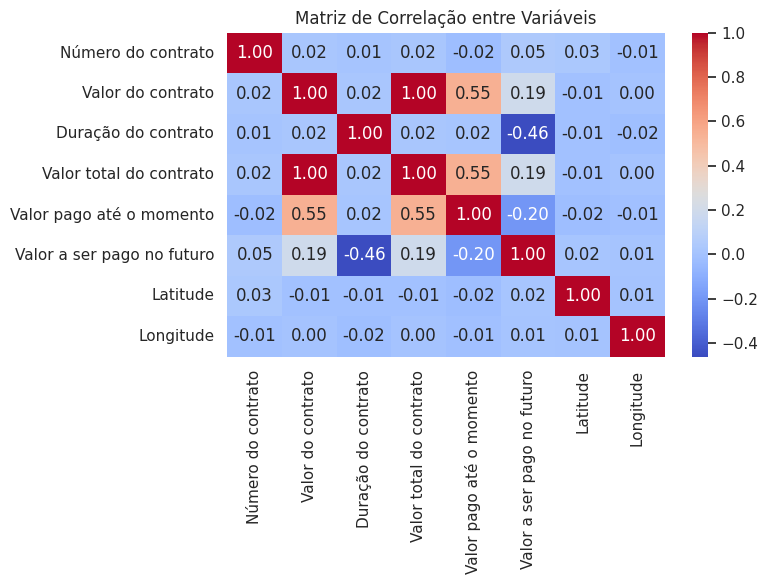

In [ ]:
# Matriz de correlação entre variáveis
correlacao = dados_contrato.corr()
plt.figure(figsize=(8, 6))
sns.set(style='whitegrid')
sns.heatmap(data=correlacao, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação entre Variáveis')
plt.tight_layout()
plt.show()

# **Exercício**

**Faça uma análise do histórico de pagamentos. Sua análise precisa de recursos gráficos e responder as seguintes perguntas:**

# **Quais são os principais fornecedores?**

In [ ]:


# Conta a frequência de cada fornecedor
fornecedores_contagem = df["Nome da empresa ou fornecedor contratado"].value_counts()

# Mostra os 10 principais fornecedores
principais_fornecedores = fornecedores_contagem.head(10)

# Exibe os resultados
print("Principais fornecedores:")
print(principais_fornecedores)

Principais fornecedores:
Cardoso MEI       13
Porto MEI         11
Campos EIRELI     11
Aragão EIRELI     11
Moura LTDA        10
Duarte LTDA       10
Alves LTDA        10
Alves EIRELI      10
da Mata ME         9
Cavalcanti S/A     9
Name: Nome da empresa ou fornecedor contratado, dtype: int64


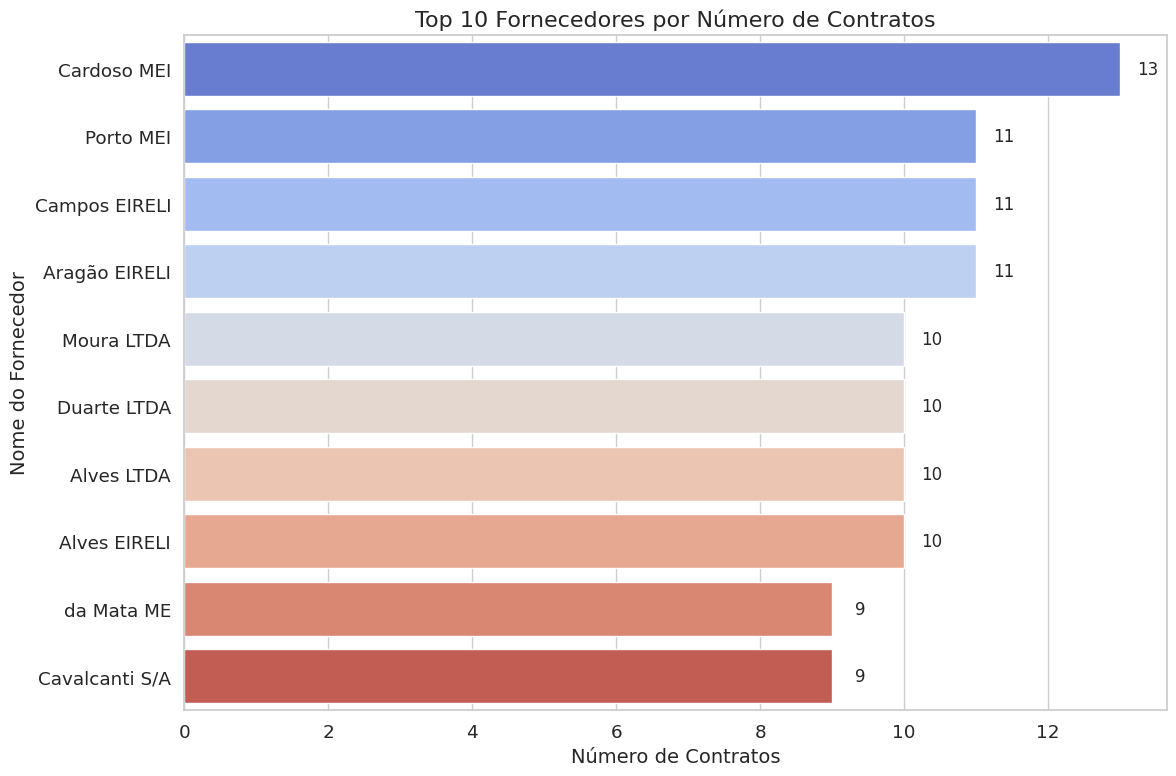

In [ ]:
# (Manteremos as mesmas configurações de estilo para todos os gráficos para uniformidade)
sns.set(style="whitegrid", font_scale=1.2)

# Obtém os 10 principais fornecedores
principais_fornecedores = fornecedores_contagem.head(10)

# Configura o tamanho da figura
plt.figure(figsize=(12, 8))

# Cria um gráfico de barras laterais (horizontal) para os 10 principais fornecedores
ax = sns.barplot(x=principais_fornecedores.values, y=principais_fornecedores.index, orient='h', palette="coolwarm")

# Adiciona rótulos aos eixos X e Y
plt.xlabel('Número de Contratos', fontsize=14)
plt.ylabel('Nome do Fornecedor', fontsize=14)

# Adiciona título ao gráfico
plt.title('Top 10 Fornecedores por Número de Contratos', fontsize=16)

# Adiciona porcentagem no final de cada barra
for p in ax.patches:
    ax.annotate(f'{p.get_width():.0f}',
                (p.get_width(), p.get_y() + p.get_height() / 2.),
                ha='center',
                va='center',
                xytext=(20, 0),
                textcoords='offset points',
                fontsize=12)

# Exibe o gráfico
plt.tight_layout()
plt.show()

# **Quais regiões receberam mais verbas?**

In [ ]:
# Agrupando por região e contando o número de contratos em cada grupo
contratos_por_regiao = df.groupby('Região').size().reset_index(name='Número de Contratos')

# Exibindo a lista de contratos por região
print(contratos_por_regiao)

         Região  Número de Contratos
0  Centro-Oeste                  485
1      Nordeste                  977
2         Norte                  635
3       Sudeste                  610
4           Sul                  293


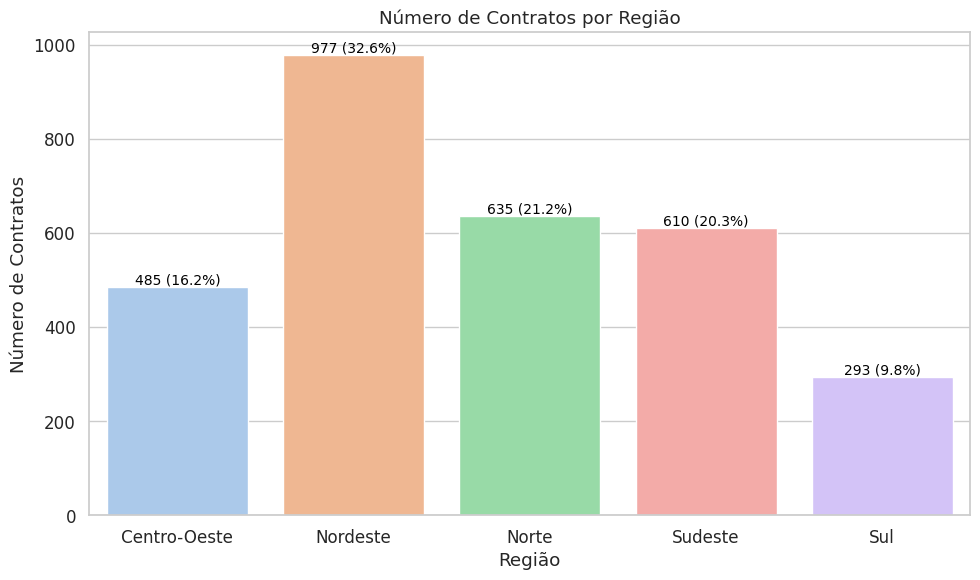

In [ ]:
# Configura o tamanho da figura e o estilo
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid", font_scale=1.1)

# Cria um gráfico de barras
ax = sns.barplot(x='Região', y='Número de Contratos', data=contratos_por_regiao, palette="pastel")

# Adiciona anotação de número e porcentagem no topo de cada barra
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f} ({p.get_height() / len(df) * 100:.1f}%)',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

# Adiciona título ao gráfico e rótulos aos eixos
plt.title('Número de Contratos por Região')
plt.xlabel('Região')
plt.ylabel('Número de Contratos')

# Ajusta o layout
plt.tight_layout()

# Exibe o gráfico
plt.show()

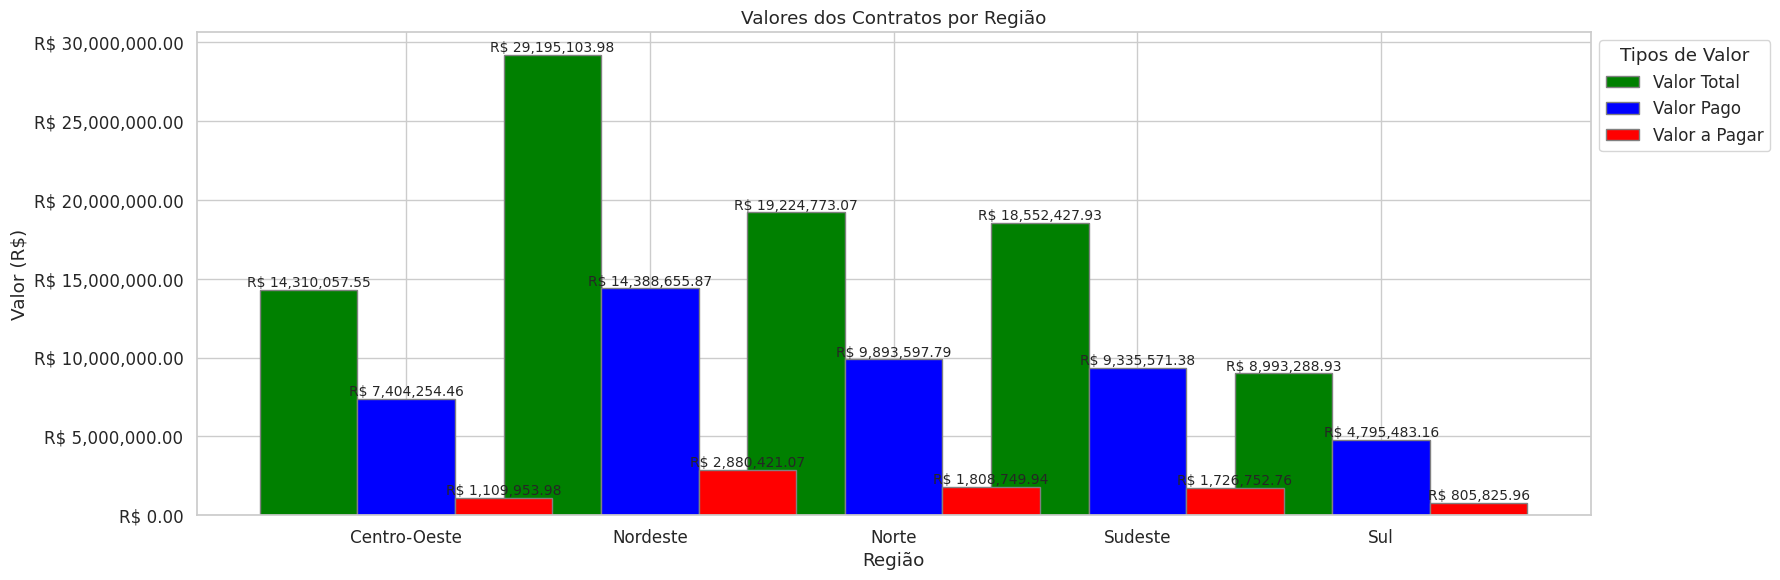

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.ticker as mtick

# ... (seu código para gerar dados e DataFrame)

# Agrupa os dados por região e calcula os totais
contratos_regiao = df.groupby('Região').agg({
    'Valor total do contrato': 'sum',
    'Valor pago até o momento': 'sum',
    'Valor a ser pago no futuro': 'sum'
}).reset_index()

# Configura o tamanho da figura e o estilo
plt.figure(figsize=(18, 6))  # Aumentei o tamanho aqui
sns.set(style="whitegrid", font_scale=1.1)

# Define as larguras das barras e suas posições
barWidth = 0.4  # Aumentei o valor aqui
r1 = np.arange(len(contratos_regiao))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

# Plota as barras
bars1 = plt.bar(r1, contratos_regiao['Valor total do contrato'], color='green', width=barWidth, edgecolor='grey', label='Valor Total')
bars2 = plt.bar(r2, contratos_regiao['Valor pago até o momento'], color='blue', width=barWidth, edgecolor='grey', label='Valor Pago')
bars3 = plt.bar(r3, contratos_regiao['Valor a ser pago no futuro'], color='red', width=barWidth, edgecolor='grey', label='Valor a Pagar')

# Adiciona rótulos com o número absoluto e a porcentagem de contratos acima de cada barra
def add_labels(bars):
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval, 'R$ {:,.2f}'.format(yval), ha='center', va='bottom', fontsize=10)

add_labels(bars1)
add_labels(bars2)
add_labels(bars3)

# Adiciona título ao gráfico e rótulos aos eixos
plt.title('Valores dos Contratos por Região')
plt.xlabel('Região')
plt.ylabel('Valor (R$)')

# Adiciona rótulos de região no eixo X
plt.xticks([r + barWidth for r in range(len(contratos_regiao))], contratos_regiao['Região'])

# Adiciona legenda com um espaçamento maior
plt.legend(title='Tipos de Valor', bbox_to_anchor=(1, 1), loc='upper left')

# Adiciona formatação em dinheiro aos rótulos do eixo Y
plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('R$ {x:,.2f}'))

# Ajusta o layout
plt.tight_layout()

# Exibe o gráfico
plt.show()



# **Quanto falta para pagar de cada contrato?**

In [ ]:
# Agrupa por agência governamental e calcula a soma do "Valor a Pagar" para cada ministério
valor_a_pagar_por_ministerio = df.groupby('Nome da agência governamental')['Valor a ser pago no futuro'].sum().reset_index()

# Exibe o DataFrame resultante
print(valor_a_pagar_por_ministerio)

                       Nome da agência governamental  \
0  Ministério da Agricultura, Pecuária e Abasteci...   
1                               Ministério da Defesa   
2                             Ministério da Economia   
3                             Ministério da Educação   
4                              Ministério da Justiça   
5                                Ministério da Saúde   
6                 Ministério das Relações Exteriores   
7             Ministério do Desenvolvimento Regional   
8                        Ministério do Meio Ambiente   

   Valor a ser pago no futuro  
0                   889978.07  
1                   913317.57  
2                   954986.87  
3                   873777.77  
4                   918154.94  
5                   877719.59  
6                   906734.24  
7                   926609.65  
8                  1070425.01  


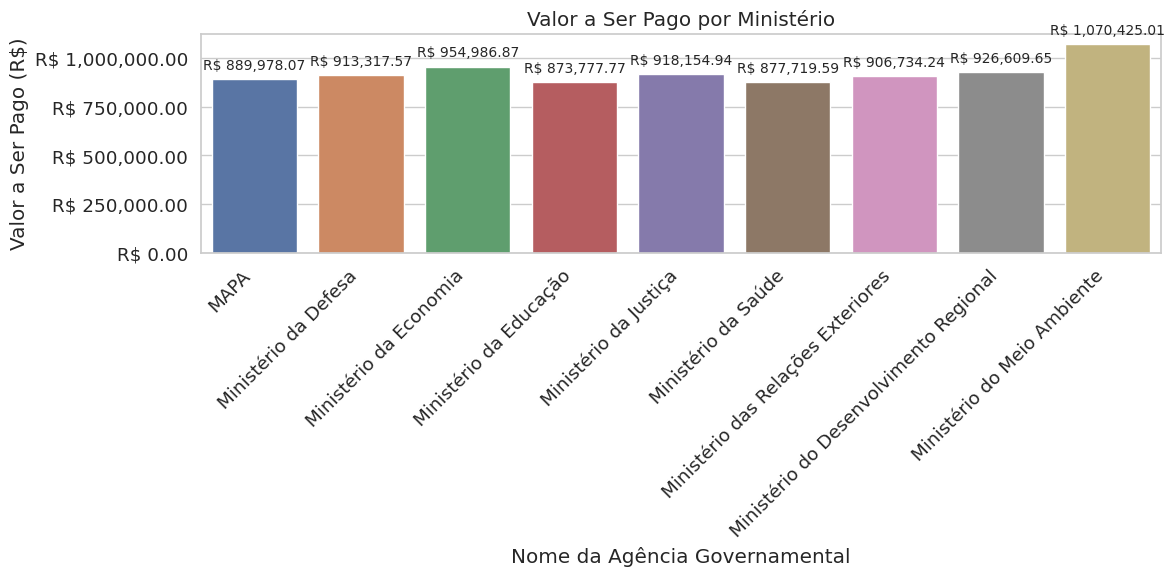

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ... (seu código para gerar dados e DataFrame)

# Abrevia o nome do ministério
df['Nome da agência governamental'] = df['Nome da agência governamental'].replace(
    "Ministério da Agricultura, Pecuária e Abastecimento", "MAPA"
)

# Agrupa por ministério e calcula os valores a serem pagos
valor_a_pagar_por_ministerio = df.groupby('Nome da agência governamental')['Valor a ser pago no futuro'].sum().reset_index()

# Configura o tamanho da figura e o estilo
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid", font_scale=1.2)

# Cria um gráfico de barras
ax = sns.barplot(x='Nome da agência governamental', y='Valor a ser pago no futuro', data=valor_a_pagar_por_ministerio)

# Adiciona título ao gráfico e rótulos aos eixos
plt.title('Valor a Ser Pago por Ministério')
plt.xlabel('Nome da Agência Governamental')
plt.ylabel('Valor a Ser Pago (R$)')

# Rotaciona e ajusta os rótulos do eixo X para melhor visualização
plt.xticks(rotation=45, ha='right')

# Formata os rótulos do eixo Y como dinheiro (R$) com duas casas decimais e separador de milhares
ax.yaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter("R$ {x:,.2f}"))

# Adiciona anotações acima de cada barra com os valores exatos
for p in ax.patches:
    ax.annotate(f'R$ {p.get_height():,.2f}', (p.get_x() + p.get_width()/2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=10)

# Ajusta o layout
plt.tight_layout()

# Exibe o gráfico
plt.show()


# **Quais colunas deveriam ser acrescentadas para auxiliar na detecção de fraudes?**

In [ ]:
# Adicionar colunas para detecção de fraudes diretamente ao DataFrame
df['Data Última Auditoria'] = [fake.date_between_dates(date_start=data_assinatura, date_end=datetime.now()) for _ in range(quantidade_de_contratos)]
df['Nome do Auditor'] = [fake.name() for _ in range(quantidade_de_contratos)]
df['Status de Conformidade'] = [random.choice(['Conforme', 'Não conforme', 'Pendente']) for _ in range(quantidade_de_contratos)]
df['Número de Alterações no Contrato'] = [random.randint(0, 5) for _ in range(quantidade_de_contratos)]

# Exibindo um exemplo
print(df.head())

   Número do contrato Data de assinatura do contrato  Valor do contrato  \
0                3643                     2020-06-11           23979.73   
1                6988                     2021-12-15           45533.14   
2                8049                     2023-01-20           43671.79   
3                4691                     2021-07-23           44221.83   
4                1608                     2019-08-09           37843.07   

   Duração do contrato Nome da empresa ou fornecedor contratado  \
0                    4                            Oliveira LTDA   
1                    3                 Rodrigues Pires Ltda. ME   
2                    2                               Castro MEI   
3                    4                 Alves Ferreira Ltda. MEI   
4                    4                Carvalho da Mata - ME S/A   

  Nome da agência governamental  Valor total do contrato  \
0        Ministério da Educação                 23979.73   
1           Ministério da 

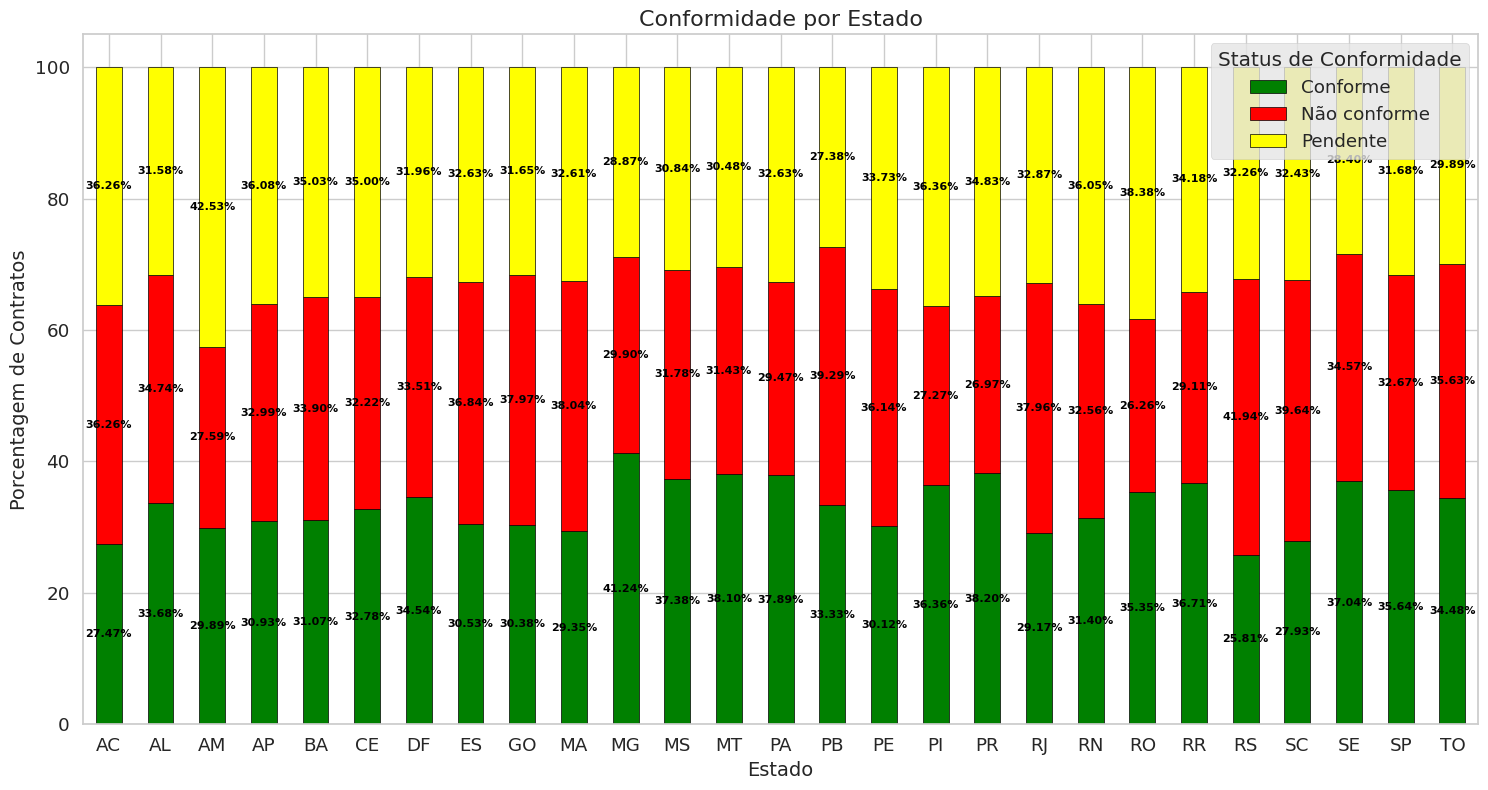

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# ... (seu código para gerar dados e DataFrame)

# Mapear as cores conforme o status de conformidade
status_colors = {'Conforme': 'green', 'Não conforme': 'red', 'Pendente': 'yellow'}

# Criar um DataFrame agrupando por Estado e Status de Conformidade
df_grouped = df.groupby(['Estado', 'Status de Conformidade']).size().unstack()

# Reordenar as colunas para garantir a consistência das cores
df_grouped = df_grouped[['Conforme', 'Não conforme', 'Pendente']]

# Calcular porcentagens para cada estado
df_percentage = df_grouped.div(df_grouped.sum(axis=1), axis=0) * 100

# Ajuste o tamanho da figura diretamente usando o matplotlib
fig, ax = plt.subplots(figsize=(15, 8))

# Configuração de estilo
plt.style.use('ggplot')

# Crie um gráfico de barras empilhadas usando seaborn com as cores mapeadas
df_percentage.plot(kind='bar', stacked=True, color=[status_colors[status] for status in df_percentage.columns], edgecolor='black', ax=ax)

# Adicionar rótulos de porcentagem nas barras
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.2f}%', (x + width/2, y + height/2), ha='center', va='center', fontsize=8, color='black', weight='bold')

# Ajuste os títulos e rótulos
plt.title('Conformidade por Estado', fontsize=16)
plt.xlabel('Estado', fontsize=14)
plt.ylabel('Porcentagem de Contratos', fontsize=14)
plt.legend(title='Status de Conformidade')

# Mantém os rótulos dos estados na horizontal
plt.xticks(rotation=0, ha='center')

plt.tight_layout()
plt.show()




# **Visualização da distribuição da duração dos contratos**

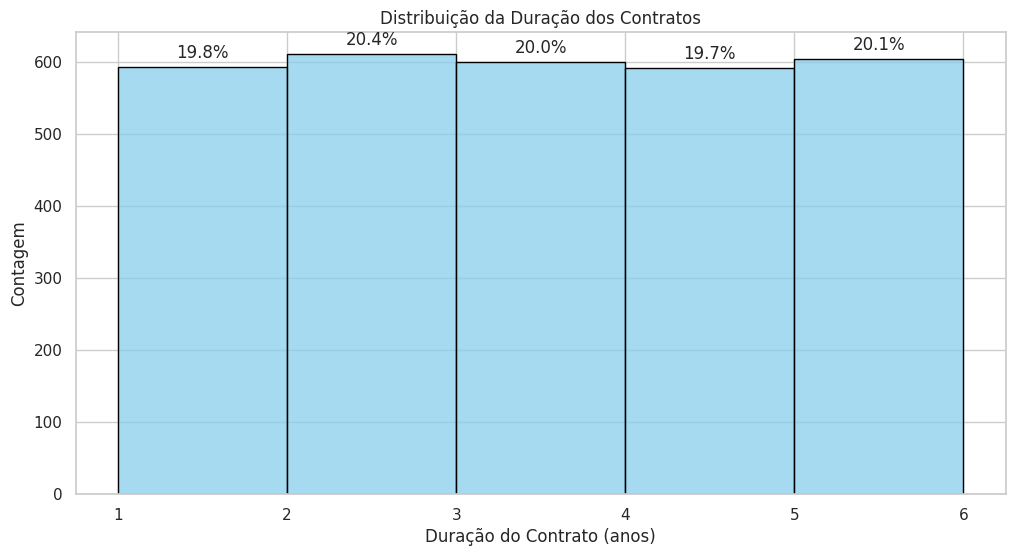

In [ ]:
# Configura o tamanho da figura
plt.figure(figsize=(12, 6))

# Escolhe o estilo de fundo
sns.set(style="whitegrid")

# Cria um histograma
ax = sns.histplot(data=df, x='Duração do contrato', bins=range(1, df['Duração do contrato'].max() + 2), kde=False, color='skyblue', edgecolor='black')

# Adiciona título ao gráfico
plt.title('Distribuição da Duração dos Contratos')

# Adiciona rótulos aos eixos X e Y
plt.xlabel('Duração do Contrato (anos)')
plt.ylabel('Contagem')

# Adiciona percentuais no topo das barras
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height/len(df)*100:.1f}%', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Exibe o gráfico
plt.show()

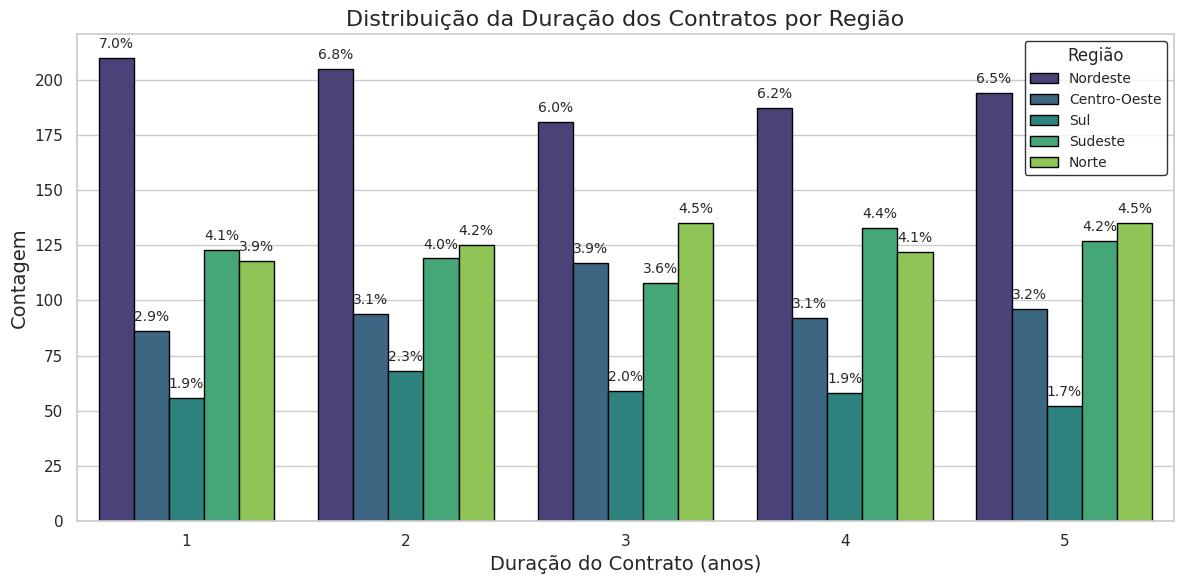

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ... (seu código para gerar dados e DataFrame)

# Configurações gerais
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")

# Criação do gráfico de barras
ax = sns.countplot(data=df,
                   x='Duração do contrato',
                   hue='Região',
                   palette='viridis',
                   edgecolor='black')

# Adicionar porcentagens nas barras
total = len(df)  # Total de contratos para calcular porcentagens

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height / total:.1%}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', xytext=(0, 5), textcoords='offset points', fontsize=10)

# Configuração de títulos e rótulos
plt.title('Distribuição da Duração dos Contratos por Região', fontsize=16)
plt.xlabel('Duração do Contrato (anos)', fontsize=14)
plt.ylabel('Contagem', fontsize=14)

# Configuração da legenda
plt.legend(title='Região', title_fontsize='12', loc='upper right', fontsize=10, edgecolor='black')

# Ajustes finais e exibição do gráfico
plt.tight_layout()
plt.show()


# **Fazer uma análise com regressão linear sobre verbas**

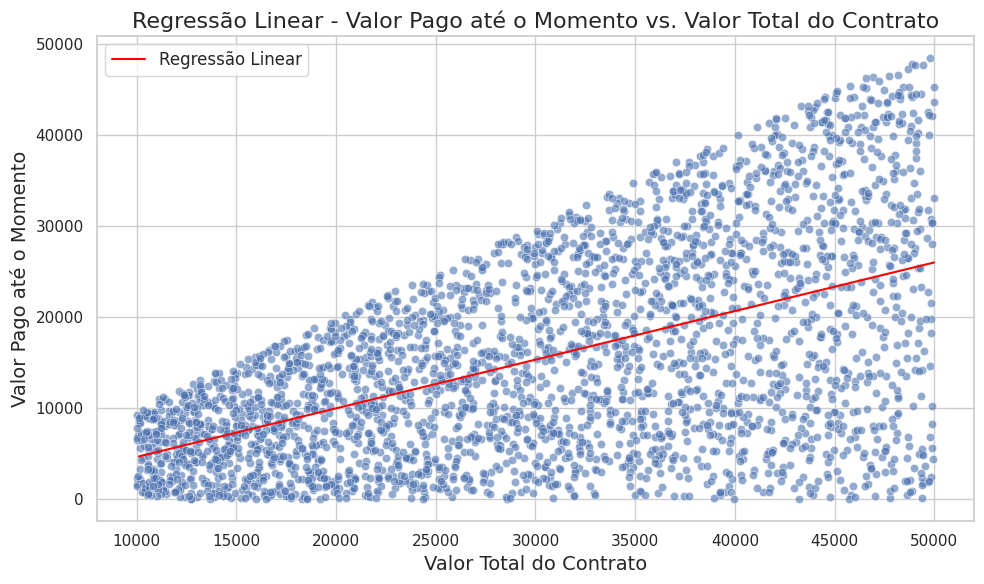

In [ ]:
# Selecionando as colunas relevantes para a regressão e removendo dados faltantes
dados_regressao_valor_pago = df[['Valor pago até o momento', 'Valor total do contrato']].dropna()

# Dividindo os dados em conjunto de treinamento e teste
X_valor_pago = dados_regressao_valor_pago[['Valor total do contrato']]
y_valor_pago = dados_regressao_valor_pago['Valor pago até o momento']
X_train, X_test, y_train, y_test = train_test_split(X_valor_pago, y_valor_pago, test_size=0.2, random_state=42)

# Criação e treinamento do modelo
modelo_valor_pago = LinearRegression()
modelo_valor_pago.fit(X_train, y_train)

# Realizando previsões
y_pred = modelo_valor_pago.predict(X_test)

# Visualização
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Valor total do contrato', y='Valor pago até o momento', data=dados_regressao_valor_pago, alpha=0.6)
sns.lineplot(x=X_test['Valor total do contrato'], y=y_pred, color='red', label='Regressão Linear')

plt.title('Regressão Linear - Valor Pago até o Momento vs. Valor Total do Contrato', fontsize=16)
plt.xlabel('Valor Total do Contrato', fontsize=14)
plt.ylabel('Valor Pago até o Momento', fontsize=14)
plt.legend(fontsize=12, loc="upper left")

plt.tight_layout()
plt.show()

Mean Squared Error: 136435459.35915422


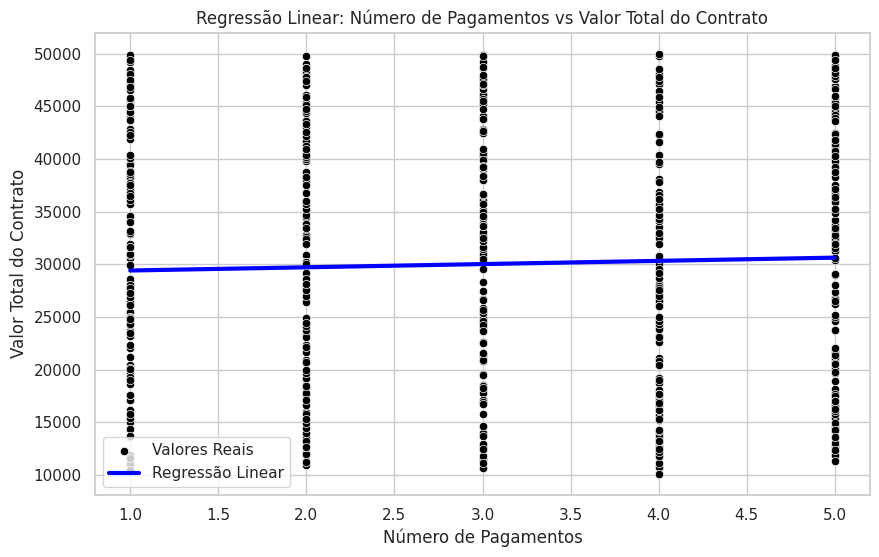

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt

# ... (Seu código para gerar dados e DataFrame)

# Vamos criar uma cópia do DataFrame para evitar modificar o original
df_regressao = df.copy()

# Extrair características (features) e variável de destino
X = df_regressao['Histórico de Pagamentos'].apply(lambda x: len(x)).values.reshape(-1, 1)  # Número de pagamentos
y = df_regressao['Valor total do contrato'].values

# Dividir o conjunto de dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criar e treinar o modelo de regressão linear
modelo_regressao = LinearRegression()
modelo_regressao.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = modelo_regressao.predict(X_test)

# Avaliar o desempenho do modelo
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Visualizar a relação e a linha da regressão
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_test.flatten(), y=y_test, color='black', label='Valores Reais')
sns.lineplot(x=X_test.flatten(), y=y_pred, color='blue', linewidth=3, label='Regressão Linear')
plt.xlabel('Número de Pagamentos')
plt.ylabel('Valor Total do Contrato')
plt.title('Regressão Linear: Número de Pagamentos vs Valor Total do Contrato')
plt.legend()
plt.show()



# **Qual valor total investido por Ministérios? (Bônus)**

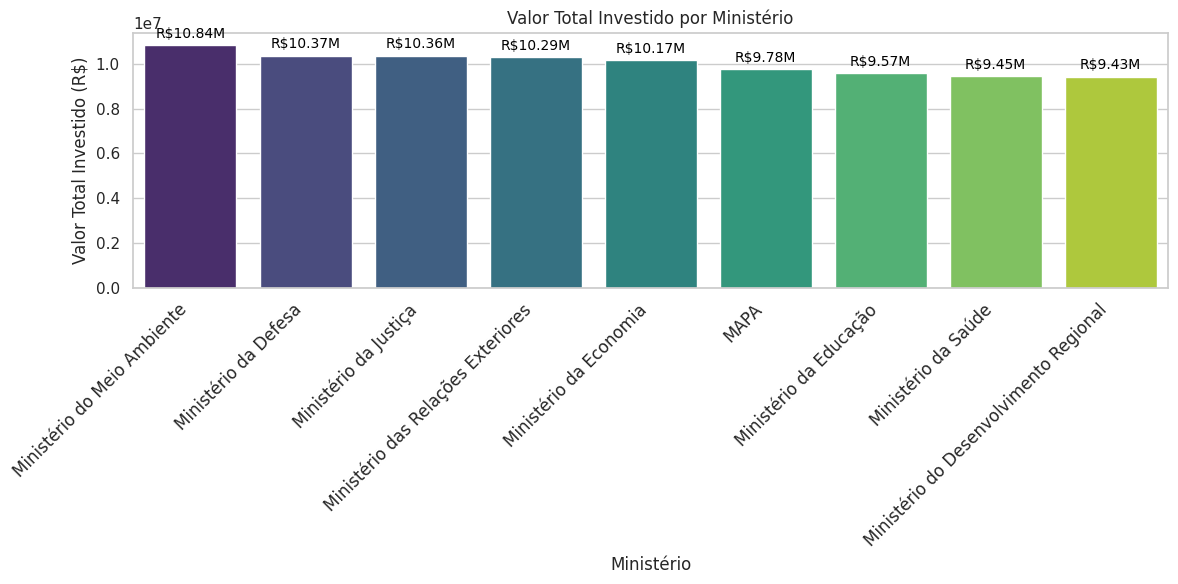

In [ ]:
# Abreviar o nome do Ministério da Agricultura, Pecuária e Abastecimento
df['Nome da agência governamental'] = df['Nome da agência governamental'].replace('Ministério da Agricultura, Pecuária e Abastecimento', 'MAPA')

# Agrupar por ministério e calcular o valor total investido
df_grouped = df.groupby('Nome da agência governamental')['Valor total do contrato'].sum().reset_index().sort_values(by='Valor total do contrato', ascending=False)

# Visualização
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Nome da agência governamental', y='Valor total do contrato', data=df_grouped, palette='viridis')

# Adicionar rótulos e título
plt.title('Valor Total Investido por Ministério')
plt.xlabel('Ministério')
plt.ylabel('Valor Total Investido (R$)')

# Adicionar os valores no topo de cada barra
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.03 * df_grouped['Valor total do contrato'].max(), f'R${height/1e6:.2f}M', ha='center', fontsize=10, color='black')

plt.xticks(rotation=45, ha='right', fontsize=12)  # Rotacionar rótulos do eixo x para melhor legibilidade
plt.tight_layout()
plt.show()